#### This is my notebook, I've included it to show my thought process on my project.
* I am using a test of the Canadian National Collision Database https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a

* I believe this is incomplete or is in development because the file names have TEST next to them. And the dataset that is supposed to be from 1999-2019 but only goes from 1999-2001

* There also seems to be missing data. I checked with some of the officially reported statistics on the website and some values are lower then what is presented on the website (less fatalities then reported on the official website for 2001 for example)

* Overall though,  this project is to just get practice with Pandas and Matplotlib. 

##### Tasks:
* Find a way to graph the number of people involved in each accident
* Find a way to graph the frequency of injury types (no injury, fatality, injuries)

In [314]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [315]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('test99_to_2003_dataset_en.csv', low_memory = False)

In [316]:
# Creating a sample of the data to work through
sample = df.head(10)
sample


,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER,C_CASE
0,1999.0,1,1,20,2.0,2,34,UU,1,5,3,3,1,6,1990,1,M,41,11,1,UU,1,752.0
1,1999.0,1,1,20,2.0,2,34,UU,1,5,3,3,2,1,1987,1,M,19,11,1,UU,1,752.0
2,1999.0,1,1,20,2.0,2,34,UU,1,5,3,3,2,1,1987,2,F,20,13,2,2,2,752.0
3,1999.0,1,1,8,2.0,1,1,UU,5,3,6,18,1,1,1986,1,M,46,11,1,UU,1,753.0
4,1999.0,1,1,8,2.0,1,1,UU,5,3,6,18,99,NN,NNNN,1,M,5,99,2,UU,3,753.0
5,1999.0,1,1,17,2.0,3,QQ,QQ,1,2,1,1,1,1,1984,1,M,28,11,1,UU,1,820.0
6,1999.0,1,1,17,2.0,3,QQ,QQ,1,2,1,1,2,1,1991,1,M,21,11,1,UU,1,820.0
7,1999.0,1,1,17,2.0,3,QQ,QQ,1,2,1,1,2,1,1991,2,F,UU,13,2,UU,2,820.0
8,1999.0,1,1,17,2.0,3,QQ,QQ,1,2,1,1,3,1,1992,1,M,UU,11,2,UU,1,820.0
9,1999.0,1,1,15,2.0,1,4,UU,1,5,U,UU,1,1,1997,1,M,61,11,1,UU,1,932.0


1. First I'm going to groupby my dataframe by C_CASE. This returns a dictionary.

2. The keys in the dictionary are the case numbers and the values are lists. The length of the list is how many people where involved in that collision.

3. I used list comprehension to create a list containing the length of all those values and now I have a list containing the the number of people involved in each collision.

4. I then convert that list into a pandas series dataframe.

5. I then call value_counts() which returns a new series with all the counts of the values and sort them by the index (which is the number of people involved in the incident)

6. I then graphed out the data :D

7. To check if I did this correctly I used the first 8 rows. I know there are three cases in that sample and that two cases had 3 people involved and one case had 2 which should produce a graph with two bars. The bar with the xlabel of 2 should have a y axis value of 1 and the bar with the xlabel of 3 should have a ylabel value of 2. This worked :D

8. I then name the labels and added a title

9. I now can apply this to the whole database to get a bar graph which shows the number of people involved in an incident and the frequency of those numbers. 

Text(0.5, 1.0, 'Number Of People Involved In A Collision (1999-2003')

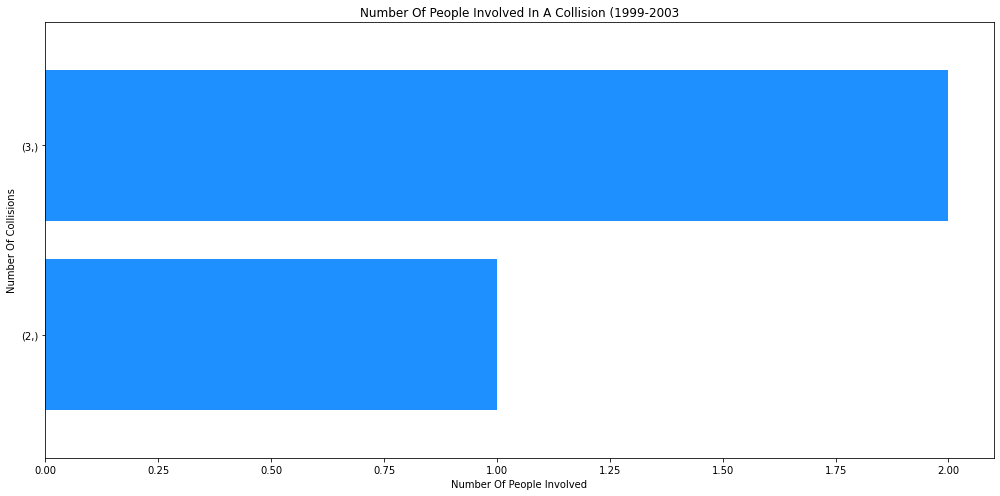

In [347]:
sample = df.head(8)
collision_cases = pd.DataFrame([len(case) for case in sample.groupby('C_CASE').groups.values()])
collision_value_counts = collision_cases.value_counts().sort_index()

plt.rcParams["figure.figsize"] = [14, 7]
plt.rcParams["figure.autolayout"] = True

collision_value_counts.plot(kind='barh', color='dodgerblue', width=0.8)
plt.pyplot.xlabel('Number Of People Involved')
plt.pyplot.ylabel("Number Of Collisions")
plt.pyplot.title('Number Of People Involved In A Collision (1999-2003')

Text(0.5, 1.0, 'Number Of People Involved In A Collision (1999-2003')

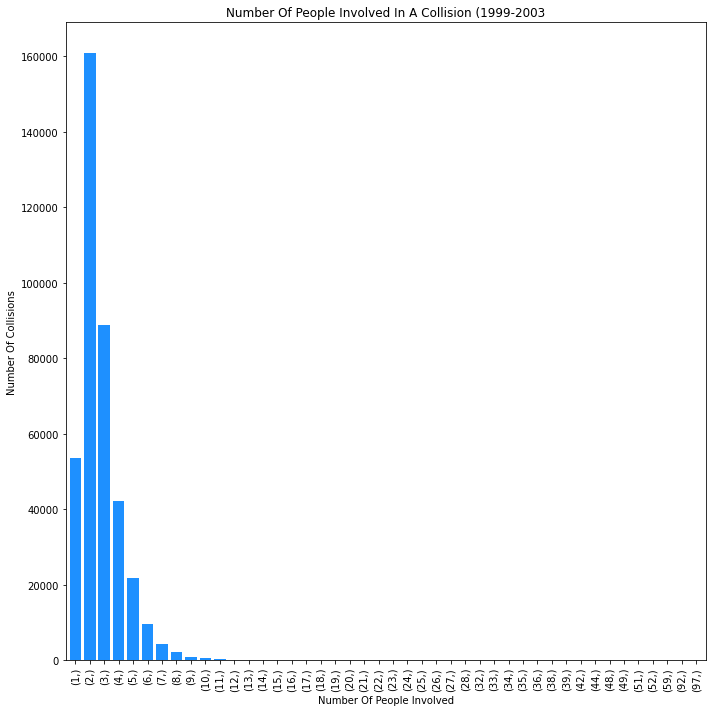

In [346]:

collision_cases = pd.DataFrame([len(case) for case in df.groupby('C_CASE').groups.values()])
collision_value_counts = collision_cases.value_counts().sort_index()

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

collision_value_counts.plot(kind='bar', color='dodgerblue', width=0.8)
plt.pyplot.xlabel('Number Of People Involved')
plt.pyplot.ylabel("Number Of Collisions")
plt.pyplot.title('Number Of People Involved In A Collision (1999-2003')

This is a good start! But I noticed that the frequencies of incidents that include over 10+ people is really hard to see. What's clear though is that the that a collision involving 2 people is the most frequent type of collision. 

Next I want to make a graph displaying the frequency of injury severity in 2001.

1. I'm using the P_ISEV column to find this out. I'll start out first by grabbing all the rows that are in the year 2001 by checking if column C_YEAR is equal to 2001.0 (for some reason it's a float)
2. Next I'm getting the value counts for each category and graphing it out.


<AxesSubplot:>

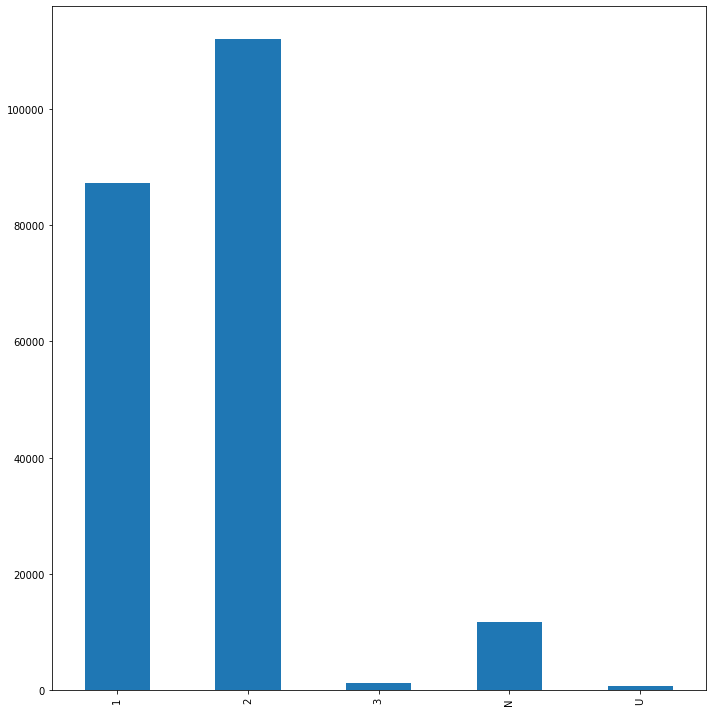

In [387]:
data_2001 = df[df['C_YEAR'] == 2001.0]
data_2001 = data_2001['P_ISEV'].value_counts().sort_index()

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
data_2001.plot(kind='bar')